<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Feature_Importance_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Importance**

##### **1) Random Forest Classifier**

##### **2) ExtraTreesClassifier**

------------------

In [ ]:
# Read Data
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [ ]:
Android.head(3)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),...,Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.0,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.0,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fort

In [ ]:
Android['Related apps'] = Android['Related apps'].fillna(Android['Related apps'].mode()[0])

Android['Dangerous permissions count'] = Android['Dangerous permissions count'].fillna(Android['Dangerous permissions count'].median())

Android['Description'] = Android['Description'].fillna(Android['Description'].mode()[0])

Android['App'] = Android['App'].fillna(Android['App'].mode()[0])

In [ ]:
List = ['App', 'Package', 'Category', 'Description', 'Related apps', 'Class']

In [ ]:
X = Android.drop(columns=List)
y = Android['Class']

### **1) Random Forest Classifier**

In [ ]:
# Feature importance is inbuilt with Tree Based Classifiers
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# FEATURE IMPORTANCE FEATURE SELECTION
import numpy as np
np.random.seed(42)

In [ ]:
# instantiate RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

In [ ]:
# determine 20 most important features
df_imp_feat = feat_importances.nlargest(20)

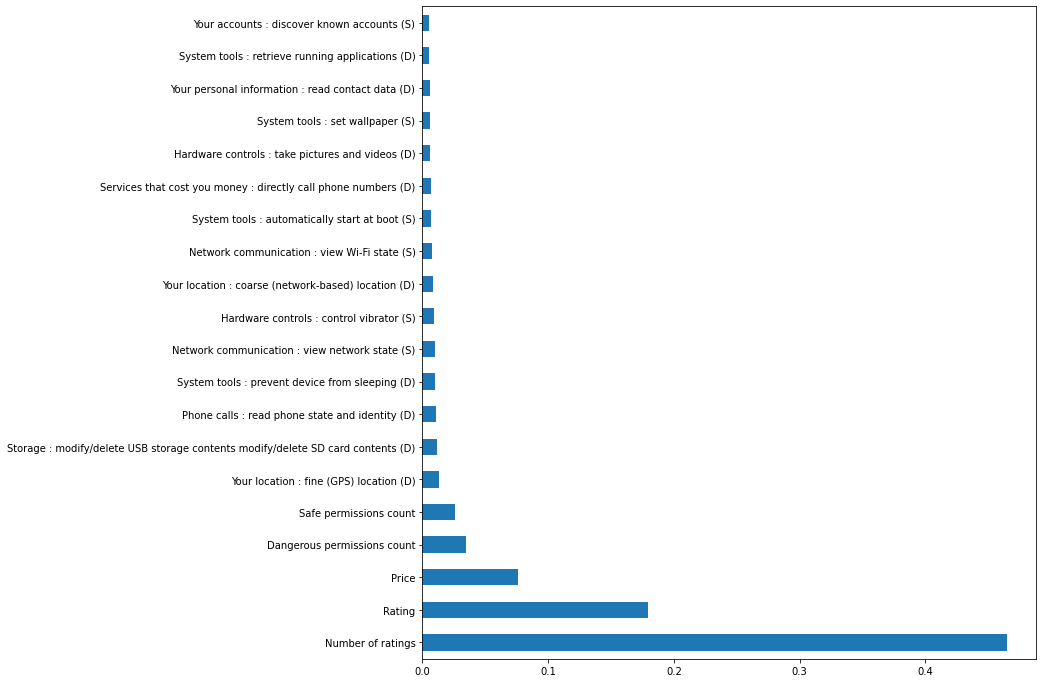

In [ ]:
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize=(11,12))
df_imp_feat.plot(kind='barh')
plt.show()

In [ ]:
print(df_imp_feat)

Number of ratings                                                                  0.464837
Rating                                                                             0.179456
Price                                                                              0.075859
Dangerous permissions count                                                        0.034599
Safe permissions count                                                             0.025920
Your location : fine (GPS) location (D)                                            0.012969
Storage : modify/delete USB storage contents modify/delete SD card contents (D)    0.011472
Phone calls : read phone state and identity (D)                                    0.010527
System tools : prevent device from sleeping (D)                                    0.010351
Network communication : view network state (S)                                     0.010340
Hardware controls : control vibrator (S)                                        

### **2) ExtraTreesClassifier**

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_)

[1.73511662e-01 4.91856899e-01 6.49374972e-02 2.40061167e-02
 1.88308098e-02 1.92111280e-04 1.16612815e-04 0.00000000e+00
 2.48014993e-04 5.05615951e-06 1.39774710e-05 1.62323238e-04
 0.00000000e+00 3.95155203e-05 8.48137983e-06 9.04505107e-07
 1.23409237e-04 2.86615049e-05 1.91643713e-04 1.60712175e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.17994119e-04
 1.13837222e-04 8.66762171e-04 0.00000000e+00 5.31469310e-04
 5.85862920e-05 4.61557809e-04 3.12394632e-04 2.95121632e-04
 6.79430057e-04 7.61255611e-04 7.27162525e-04 0.00000000e+00
 1.29664971e-04 1.70368371e-04 3.33363913e-05 2.73473939e-04
 0.00000000e+00 9.18215640e-05 0.00000000e+00 0.00000000e+00
 1.14970882e-03 6.16385399e-04 2.47063315e-04 0.00000000e+00
 2.14998859e-05 3.70694122e-06 0.00000000e+00 5.64397789e-05
 8.02483479e-04 1.56978988e-04 2.71743910e-05 1.91539144e-04
 0.00000000e+00 4.37394948e-05 6.81122216e-05 0.00000000e+00
 0.00000000e+00 2.85262647e-05 0.00000000e+00 0.00000000e+00
 8.65430486e-06 0.000000

In [19]:
feat_importances1 = pd.Series(model.feature_importances_, index=X.columns)

In [20]:
# determine 20 most important features
df_imp_feat1 = feat_importances1.nlargest(20)

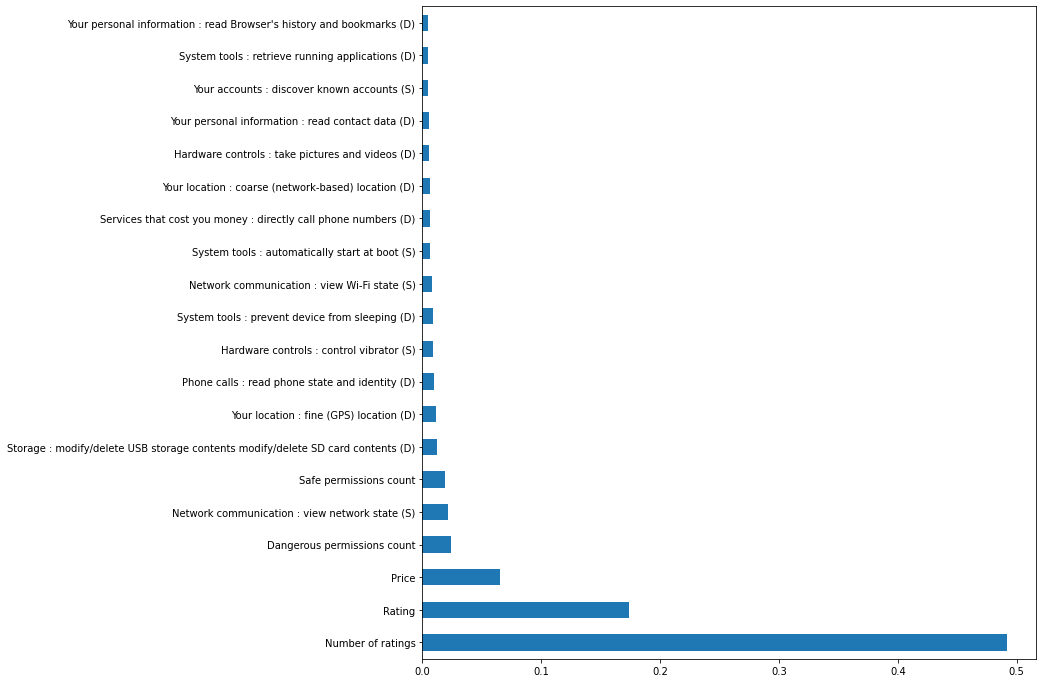

In [21]:
# plot 20 most important features
# feat_importances.nlargest(20).plot(kind='barh')

plt.figure(figsize=(11,12))
df_imp_feat1.plot(kind='barh')
plt.show()

In [22]:
print(df_imp_feat1)

Number of ratings                                                                  0.491857
Rating                                                                             0.173512
Price                                                                              0.064937
Dangerous permissions count                                                        0.024006
Network communication : view network state (S)                                     0.021599
Safe permissions count                                                             0.018831
Storage : modify/delete USB storage contents modify/delete SD card contents (D)    0.012281
Your location : fine (GPS) location (D)                                            0.011094
Phone calls : read phone state and identity (D)                                    0.009676
Hardware controls : control vibrator (S)                                           0.009284
System tools : prevent device from sleeping (D)                                 